In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

# 시간 관련
import time

In [2]:
from sklearn.model_selection import StratifiedKFold

# 모델 저장 경로
best_model_path = 'model/best_model_classification_4.dat'

# Stratified K-Fold 설정 (분류에 적합)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 평가 결과를 저장할 리스트
f1_score_list = []
model_name_list = []

In [3]:
# 데이터 준비
df1 = pd.read_csv('data/청구입금정보_최종전처리.csv')

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Segment 인코딩
encoder1 = LabelEncoder()
df1["Segment"] = encoder1.fit_transform(df1["Segment"])

# 2. ID, 기준년월 제거 후 입력(X), 결과(y) 정의
X = df1.drop(['Segment', 'ID', '기준년월'], axis=1)
y = df1['Segment']  # 이미 인코딩된 상태

# 3. 입력 데이터 표준화
scaler1 = StandardScaler()
X2 = scaler1.fit_transform(X)

# 4. 학습용 데이터 할당
train_X = X2
train_y = y

### 기본 모델 학습하기

In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd

# F1 점수 저장용 리스트
f1_score_list = []
model_name_list = []

# XGBoost 모델 (CPU 사용)
xgboost_basic_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    verbosity=0
)

# 교차 검증 (F1 Micro 기준)
r1 = cross_val_score(xgboost_basic_model, train_X, train_y, scoring='f1_micro', cv=cv)

# 결과 저장
f1_score_list.append(r1.mean())
model_name_list.append("XGBoost Basic (CPU)")

# 결과 테이블 생성 및 정렬
d1 = {'f1_micro score': f1_score_list}
result_df = pd.DataFrame(d1, index=model_name_list)
result_df.sort_values(by='f1_micro score', ascending=False, inplace=True)

# 결과 출력
display(result_df)

,f1_micro score
XGBoost Basic (CPU),0.842002


In [7]:
from lightgbm import LGBMClassifier

# LightGBM 모델 (기본 설정)
lgbm_basic_model = LGBMClassifier(random_state=42)

# 교차 검증 (F1 Micro 기준)
r2 = cross_val_score(lgbm_basic_model, train_X, train_y, scoring='f1_micro', cv=cv)

# 결과 저장
f1_score_list.append(r2.mean())
model_name_list.append("LightGBM Basic (CPU)")

# 결과 테이블 생성 및 정렬
d2 = {'f1_micro score': f1_score_list}
result_df = pd.DataFrame(d2, index=model_name_list)
result_df.sort_values(by='f1_micro score', ascending=False, inplace=True)

# 결과 출력
display(result_df)

  File "C:\Users\ska12\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\ska12\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ska12\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\ska12\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3854
[LightGBM] [Info] Number of data points in the train set: 1920000, number of used features: 21
[LightGBM] [Info] Start training from score -7.812395
[LightGBM] [Info] Start training from score -9.714246
[LightGBM] [Info] Start training from score -2.934402
[LightGBM] [Info] Start training from score -1.927461
[LightGBM] [Info] Start training from score -0.222075
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3854
[LightGBM] [Info] Number of data points in the train set: 1920000, number of used features: 21
[LightGBM] [Info] St

,f1_micro score
XGBoost Basic (CPU),0.842002
LightGBM Basic (CPU),0.801638


In [8]:
from xgboost import XGBClassifier

best_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
best_model.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [9]:
from sklearn.model_selection import train_test_split

# 전처리된 train_X, train_y를 학습용과 검증용으로 나눔
X_train, X_valid, y_train, y_valid = train_test_split(
    train_X, train_y, test_size=0.2, random_state=42, stratify=train_y
)

In [10]:
import shap
import numpy as np
import pandas as pd

# DataFrame으로 변환 (X는 원래 feature 전체 DataFrame이어야 함)
X_df = pd.DataFrame(X, columns=X.columns)

# 샘플 추출
X_sample = X_df.sample(n=500, random_state=42)

# explainer 생성
explainer = shap.Explainer(best_model, X_sample)
shap_values = explainer(X_sample)

# SHAP 값 확인
shap_vals = shap_values.values
print("SHAP values shape:", shap_vals.shape)

# 평균 절댓값 기준 SHAP 중요도 계산 (다중 클래스 처리용)
mean_shap = np.abs(shap_vals).mean(axis=0).mean(axis=1)  # (특성 수, 클래스 수) → 축 1: 클래스 평균

# 검증
print("X columns:", len(X_sample.columns))
print("mean_shap length:", len(mean_shap))

assert len(X_sample.columns) == len(mean_shap), "❌ 컬럼 수와 SHAP 길이가 다릅니다!"

# SHAP 중요도 테이블 생성
shap_importance = pd.DataFrame({
    "feature": X_sample.columns,
    "mean_abs_shap": mean_shap
})
shap_importance.sort_values(by="mean_abs_shap", ascending=False, inplace=True)

# 상위 N개 피처
top_n = 10
top_features = shap_importance["feature"].head(top_n).tolist()
print("✅ 선택된 피처 목록:", top_features)

 98%|===================| 2454/2500 [00:43<00:00]        

SHAP values shape: (500, 21, 5)
X columns: 21
mean_shap length: 21
✅ 선택된 피처 목록: ['청구금액_B0', '청구금액_R6M', '할인금액_R3M', '포인트_적립포인트_R12M', '혜택수혜금액_R3M', '청구금액_R3M', '포인트_포인트_건별_B0M', '할인건수_R3M', '대표결제일', '포인트_이용포인트_R12M']


In [11]:
# 1. SHAP top N 피처 선택
top_n = 10
top_features = shap_importance["feature"].head(top_n).tolist()

# 2. 선택된 피처만 사용해서 스케일링 + DataFrame 유지
X_scaled = pd.DataFrame(scaler1.fit_transform(X[top_features]), columns=top_features)

# 3. 학습/검증 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 예측 및 평가
xgb_preds = xgb_model.predict(X_valid)
xgb_f1 = f1_score(y_valid, xgb_preds, average='macro')
print(f"📌 XGBoost F1 Score (macro): {xgb_f1:.4f}")

📌 XGBoost F1 Score (macro): 0.4018


In [13]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(random_state=42)

lgb_model.fit(X_train, y_train)

# 예측 및 평가
lgb_preds = lgb_model.predict(X_valid)
lgb_f1 = f1_score(y_valid, lgb_preds, average='macro')
print(f"📌 LightGBM F1 Score (macro): {lgb_f1:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2057
[LightGBM] [Info] Number of data points in the train set: 1920000, number of used features: 10
[LightGBM] [Info] Start training from score -7.811109
[LightGBM] [Info] Start training from score -9.722904
[LightGBM] [Info] Start training from score -2.934402
[LightGBM] [Info] Start training from score -1.927457
[LightGBM] [Info] Start training from score -0.222076
📌 LightGBM F1 Score (macro): 0.3722


In [14]:
import pickle

# 저장할 경로
model_path = "model/xgb_shap_model.pkl"

# 모델, 인코더, 스케일러 저장
with open(model_path, 'wb') as f:
    pickle.dump(xgb_model, f)        # 학습된 모델
    pickle.dump(encoder1, f)         # LabelEncoder
    pickle.dump(scaler1, f)          # StandardScaler
    pickle.dump(top_features, f)     # 선택된 피처 리스트

print("✅ 모델 저장 완료!")

✅ 모델 저장 완료!


In [15]:
# 모델 불러오기
with open(model_path, 'rb') as f:
    loaded_model = pickle.load(f)
    loaded_encoder = pickle.load(f)
    loaded_scaler = pickle.load(f)
    loaded_features = pickle.load(f)

In [16]:
# 1. 선택된 피처만 사용
X_reduced = X[top_features]
X_scaled_reduced = scaler1.fit_transform(X_reduced)

# 2. 학습/검증 분리
X_train_red, X_valid_red, y_train_red, y_valid_red = train_test_split(
    X_scaled_reduced, y, test_size=0.2, stratify=y, random_state=42
)

# 3. 모델 새로 학습 (선택된 피처 기준으로)
from xgboost import XGBClassifier

test_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
test_model.fit(X_train_red, y_train_red)

# 4. 예측 및 평가
y_pred = test_model.predict(X_valid_red)

📌 F1 Score (micro): 0.8437

📊 Classification Report:
              precision    recall  f1-score   support

           A       0.90      0.15      0.26       972
           B       1.00      0.47      0.64       144
           C       0.61      0.38      0.46    127590
           D       0.54      0.37      0.44    349242
           E       0.89      0.96      0.92   1922052

    accuracy                           0.84   2400000
   macro avg       0.79      0.47      0.55   2400000
weighted avg       0.82      0.84      0.83   2400000

📊 Confusion Matrix:
[[    150       0     800      18       4]
 [      1      67      67       7       2]
 [     14       0   47995   44599   34982]
 [      1       0   21286  129697  198258]
 [      1       0    8770   66325 1846956]]


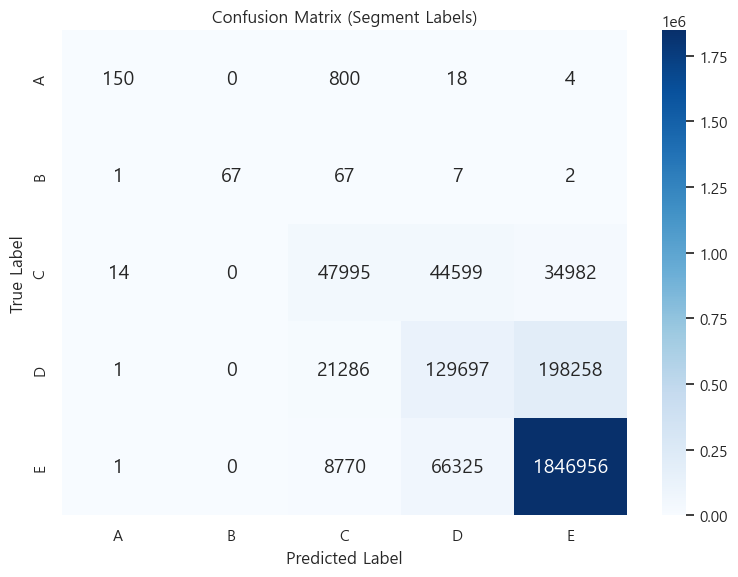

In [17]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# 🔁 입력 데이터 재구성
train_X = scaler1.transform(X[top_features])  # 전체 X에서 선택된 피처만 사용
train_y = y  # 인코딩된 Segment

# ✅ 예측
y_pred = test_model.predict(train_X)

# 📌 F1 점수 계산 (micro)
f1 = f1_score(train_y, y_pred, average='micro')
print(f"📌 F1 Score (micro): {f1:.4f}")

# ✅ 원래 세그먼트 라벨로 복원
true_labels = encoder1.inverse_transform(train_y)
pred_labels = encoder1.inverse_transform(y_pred)
label_names = encoder1.classes_  # ['A', 'B', 'C', 'D', 'E']

# 📊 Classification Report (라벨명 기준)
print("\n📊 Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=label_names))

# 📊 Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels, labels=label_names)
print("📊 Confusion Matrix:")
print(cm)

# 🎨 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names, yticklabels=label_names)
plt.title("Confusion Matrix (Segment Labels)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2057
[LightGBM] [Info] Number of data points in the train set: 1920000, number of used features: 10
[LightGBM] [Info] Start training from score -7.811109
[LightGBM] [Info] Start training from score -9.722904
[LightGBM] [Info] Start training from score -2.934402
[LightGBM] [Info] Start training from score -1.927457
[LightGBM] [Info] Start training from score -0.222076
📌 LightGBM F1 Score (micro): 0.8371

📊 Classification Report:
              precision    recall  f1-score   support

           A       0.07      0.12      0.09       194
           B       0.00      0.00      0.00        29
           C       0.56      0.35      0.43     25518
           D       0.51      0.36      0.42     69848
           E       0.89      0.96      0.9

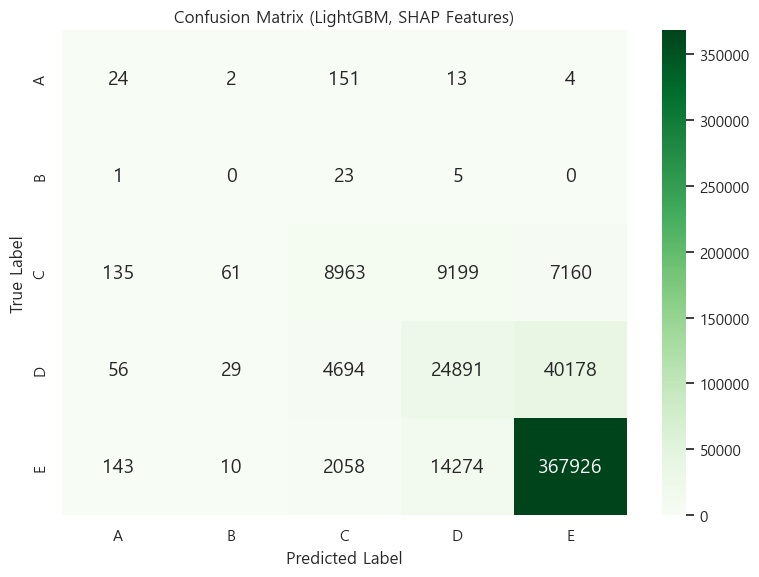

In [34]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 선택된 피처만 사용
X_reduced = X[top_features]
X_scaled_reduced = scaler1.fit_transform(X_reduced)

# 2. 학습/검증 분리
X_train_red, X_valid_red, y_train_red, y_valid_red = train_test_split(
    X_scaled_reduced, y, test_size=0.2, stratify=y, random_state=42
)

# 3. LightGBM 모델 학습
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train_red, y_train_red)

# 4. 예측
y_pred = lgbm_model.predict(X_valid_red)

# 5. F1 Score
f1 = f1_score(y_valid_red, y_pred, average='micro')
print(f"📌 LightGBM F1 Score (micro): {f1:.4f}")

# 6. 원래 세그먼트 라벨로 복원
true_labels = encoder1.inverse_transform(y_valid_red)
pred_labels = encoder1.inverse_transform(y_pred)
label_names = encoder1.classes_  # 예: ['A', 'B', 'C', 'D', 'E']

# 7. Classification Report
print("\n📊 Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=label_names))

# 8. Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels, labels=label_names)
print("📊 Confusion Matrix:")
print(cm)

# 9. Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=label_names, yticklabels=label_names)
plt.title("Confusion Matrix (LightGBM, SHAP Features)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()